In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import re 
import matplotlib.pyplot as plt
import os
sns.set_theme(style="darkgrid")
# === CSV-Datei einlesen ===
MVC_FILE = r"C:\Users\Serhat\Desktop\Ergebnisse Testing\chatbot-small-delay\results_mvc_run_"
WEBFLUX_FILE = r"C:\Users\Serhat\Desktop\Ergebnisse Testing\chatbot-small-delay\results_webflux_run_"
BATCH_SIZE = 500
test_combined = []
# === Daten einlesen ===
def combine_runs(prefix, amount_of_files, batch_size):
    combined = []
    for i in range(1, amount_of_files + 1):
        complete_filepath = f"{prefix}{i}.csv"
        df = pd.read_csv(complete_filepath)
        df['startTime'] = pd.to_datetime(df['startTime'], utc=True)
        df['endTime'] = pd.to_datetime(df['endTime'], utc=True)
        df['batch'] = (df['requestIndex'] - 1) // batch_size + 1
        combined.append(df)
        test_combined.append(df)
    return(pd.concat(combined))
    
mvc_df = combine_runs(MVC_FILE, 10, BATCH_SIZE)
webflux_df = combine_runs(WEBFLUX_FILE, 10, BATCH_SIZE)
mvc_df['type'] = 'MVC'
webflux_df['type'] = 'WebFlux'

# === Statistiken anzeigen ===
def print_stats(name, data):
    print(f"\n📊 Auswertung für {name}")
    print(f"Anzahl Requests: {len(data)}")
    print(f"Erfolgreiche Requests: {data['success'].sum()}")

    # Dauer
    duration = data['duration'].dropna()
    print("\n--- Dauer (ms) ---")
    print(f"⏱️  Mittelwert: {duration.mean():.2f}")
    print(f"📉 Standardabweichung: {duration.std():.2f}")
    print(f"⚡ Min: {duration.min()} | 🐢 Max: {duration.max()}")
    print(f"50th percentile: {duration.quantile(0.50):.0f}")
    print(f"75th percentile: {duration.quantile(0.75):.0f}")
    print(f"95th percentile: {duration.quantile(0.95):.0f}")
    print(f"99th percentile: {duration.quantile(0.99):.0f}")

    # TTFB
    ttfb = data['ttfb'].dropna()
    print("\n--- TTFB (ms) ---")
    print(f"⏱️  Mittelwert: {ttfb.mean():.2f}")
    print(f"📉 Standardabweichung: {ttfb.std():.2f}")
    print(f"⚡ Min: {ttfb.min()} | 🐢 Max: {ttfb.max()}")
    print(f"50th percentile: {ttfb.quantile(0.50):.0f}")
    print(f"75th percentile: {ttfb.quantile(0.75):.0f}")
    print(f"95th percentile: {ttfb.quantile(0.95):.0f}")
    print(f"99th percentile: {ttfb.quantile(0.99):.0f}")

print_stats("MVC", mvc_df)
print_stats("WebFlux", webflux_df)


📊 Auswertung für MVC
Anzahl Requests: 100000
Erfolgreiche Requests: 100000

--- Dauer (ms) ---
⏱️  Mittelwert: 5498.75
📉 Standardabweichung: 2184.96
⚡ Min: 2858 | 🐢 Max: 14454
50th percentile: 5951
75th percentile: 6335
95th percentile: 8920
99th percentile: 9311

--- TTFB (ms) ---
⏱️  Mittelwert: 2856.19
📉 Standardabweichung: 2222.39
⚡ Min: 256 | 🐢 Max: 11895
50th percentile: 3340
75th percentile: 3645
95th percentile: 6331
99th percentile: 6835

📊 Auswertung für WebFlux
Anzahl Requests: 100000
Erfolgreiche Requests: 99954

--- Dauer (ms) ---
⏱️  Mittelwert: 3578.41
📉 Standardabweichung: 807.09
⚡ Min: 1891 | 🐢 Max: 13572
50th percentile: 3460
75th percentile: 3637
95th percentile: 4450
99th percentile: 7420

--- TTFB (ms) ---
⏱️  Mittelwert: 1019.38
📉 Standardabweichung: 905.83
⚡ Min: 285 | 🐢 Max: 13190
50th percentile: 851
75th percentile: 1024
95th percentile: 1869
99th percentile: 5462


C:\Users\Serhat\AppData\Local\Temp\ipykernel_13696\3339750243.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


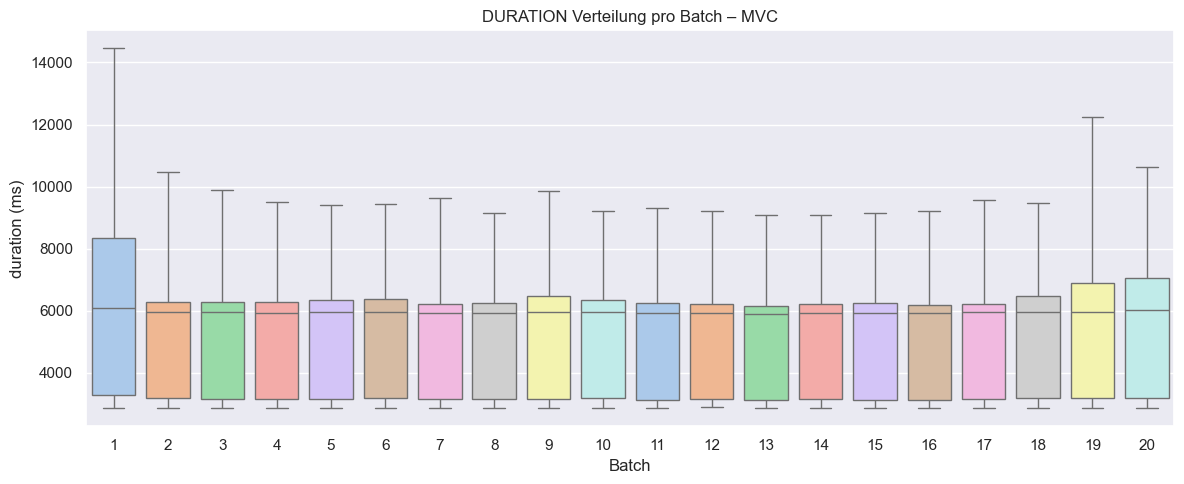

C:\Users\Serhat\AppData\Local\Temp\ipykernel_13696\3339750243.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


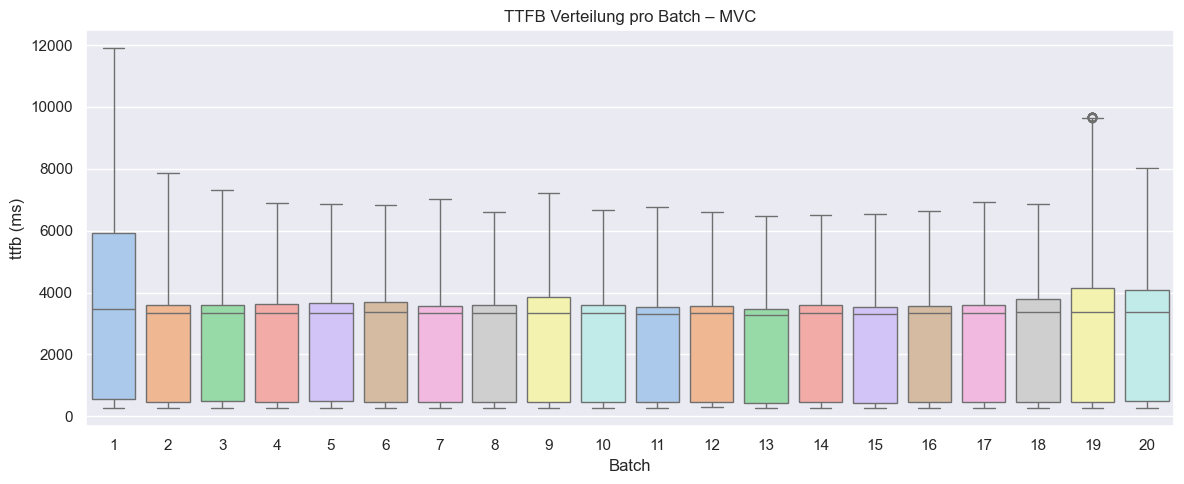

C:\Users\Serhat\AppData\Local\Temp\ipykernel_13696\3339750243.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


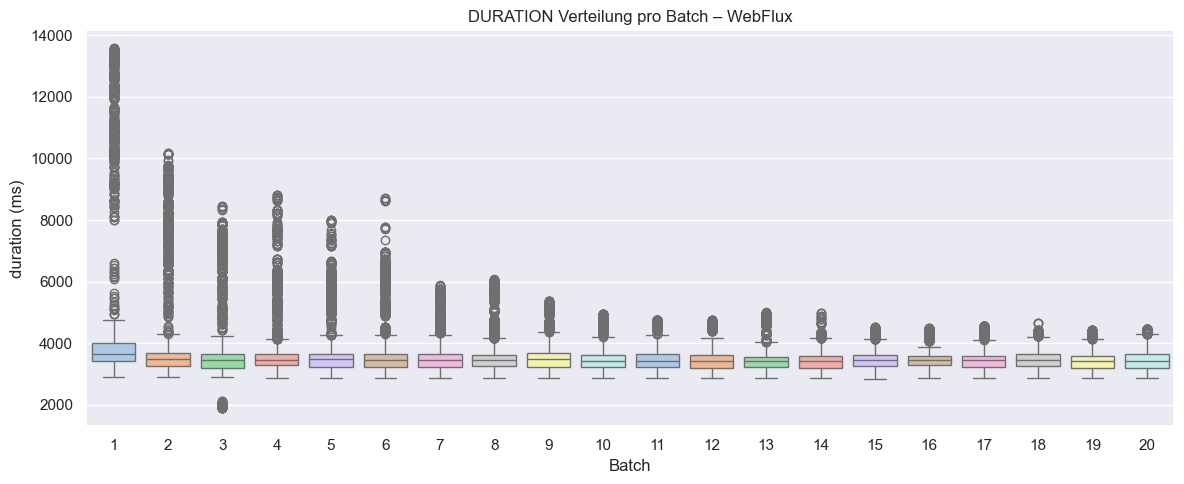

C:\Users\Serhat\AppData\Local\Temp\ipykernel_13696\3339750243.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


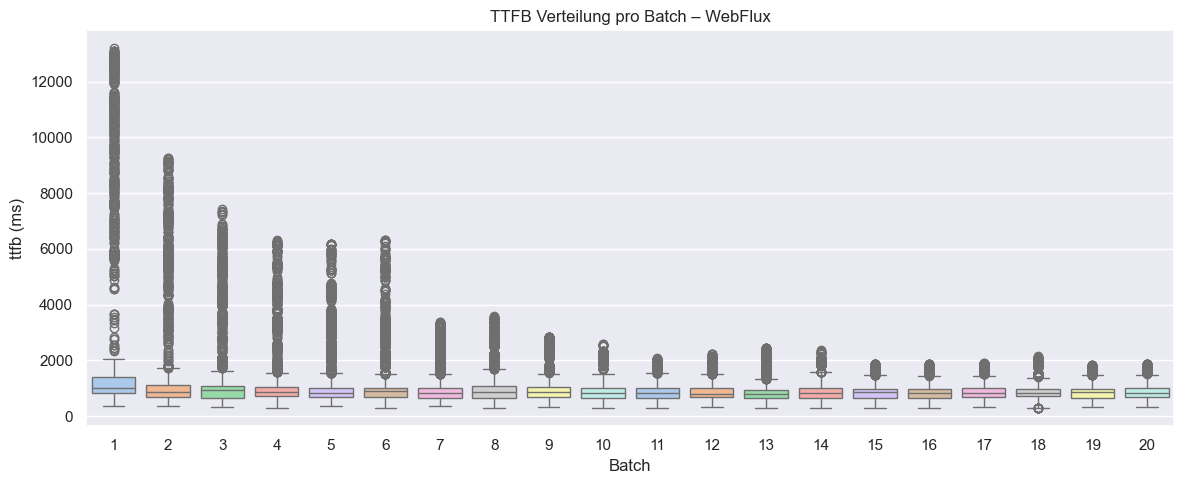

In [2]:
df = pd.concat([mvc_df, webflux_df])

# === Funktion für Boxplot pro Batch ===
def plot_boxplot_per_batch(data, metric, system_type):
    filtered = data[data['type'] == system_type]
    plt.figure(figsize=(12, 5))
    sns.boxplot(
        data=filtered,
        x='batch',
        y=metric,
        order=sorted(filtered['batch'].unique()),
        palette='pastel'
    )
    plt.title(f'{metric.upper()} Verteilung pro Batch – {system_type}')
    plt.ylabel(f'{metric} (ms)')
    plt.xlabel('Batch')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

# === Aufruf für Duration + TTFB ===
plot_boxplot_per_batch(df, 'duration', 'MVC')
plot_boxplot_per_batch(df, 'ttfb', 'MVC')
plot_boxplot_per_batch(df, 'duration', 'WebFlux')
plot_boxplot_per_batch(df, 'ttfb', 'WebFlux')

In [3]:
def load_and_clean_json(filepath):
    ansi_escape = re.compile(r'\x1b\[[0-9;]*[A-Za-z]')
    entries = []

    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            clean_line = ansi_escape.sub('', line).strip()
            if not clean_line:
                continue
            try:
                entries.append(json.loads(clean_line))
            except json.JSONDecodeError:
                continue

    return pd.json_normalize(entries)

def preprocess_stats_df(df_raw):
    df = df_raw.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    
    # CPU
    df["cpu_percent"] = df["stats.CPUPerc"].str.replace('%', '').astype(float)

    # Speicher
    df["mem_used_mb"] = df["stats.MemUsage"].str.extract(r'([\d.]+)([MG]iB)').apply(
        lambda x: float(x[0]) * (1024 if x[1] == "GiB" else 1) if pd.notnull(x[0]) else None, axis=1)
    
    df["mem_percent"] = df["stats.MemUsage"].apply(
        lambda s: round(float(m.group(1)) / (float(m.group(2)) * (1024 if m.group(3) == "GiB" else 1)) * 100, 2)
        if (m := re.match(r'([\d.]+)MiB\s*/\s*([\d.]+)([MG]iB)', s)) else None)

    # BlockIO
    df[["blockio_read", "blockio_write"]] = df["stats.BlockIO"].str.split(" / ", expand=True)
    df["blockio_read_kb"] = df["blockio_read"].str.extract(r"([\d.]+)").astype(float)
    df["blockio_write_mb"] = df["blockio_write"].str.extract(r"([\d.]+)").astype(float)
    df.drop(columns=["blockio_read", "blockio_write"], inplace=True)

    # Netzwerk
    df[["netio_in", "netio_out"]] = df["stats.NetIO"].str.split(" / ", expand=True)
    df["netio_in_mb"] = df["netio_in"].str.extract(r"([\d.]+)").astype(float)
    df["netio_out_mb"] = df["netio_out"].str.extract(r"([\d.]+)").astype(float)
    df.drop(columns=["netio_in", "netio_out"], inplace=True)

    # Prozesse
    df["pids"] = pd.to_numeric(df["stats.PIDs"], errors="coerce").astype("Int64")

    # Unnötige Spalten entfernen
    df.drop(columns=[
        "stats.MemUsage", "stats.CPUPerc", "stats.ID", "stats.MemPerc",
        "stats.Container", "stats.Name", "stats.BlockIO", "stats.NetIO", "stats.PIDs"
    ], inplace=True)

    return df

def add_relative_time(df):
    start_time = df["timestamp"].min()
    df["timestamp"] = (df["timestamp"] - start_time).dt.total_seconds()
    return df
    
# Pfade zu den Dateien
mvc_path = r"C:\Users\Serhat\Desktop\Ergebnisse Testing\chatbot-small-delay\mvc-stats-log-stream.json"
webflux_path = r"C:\Users\Serhat\Desktop\Ergebnisse Testing\chatbot-small-delay\webflux-stats-log-stream.json"

# Verarbeitung
mvc_raw_df = load_and_clean_json(mvc_path)
webflux_raw_df = load_and_clean_json(webflux_path)

json_mvc_df = preprocess_stats_df(mvc_raw_df)
json_webflux_df = preprocess_stats_df(webflux_raw_df)

json_mvc_df = add_relative_time(json_mvc_df)
json_webflux_df = add_relative_time(json_webflux_df)

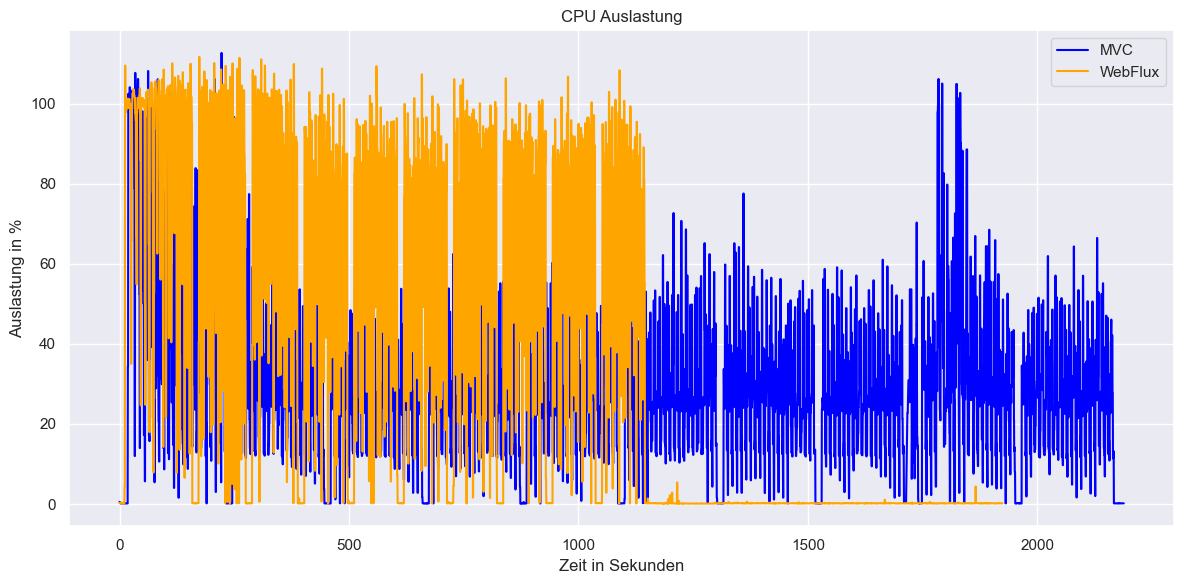

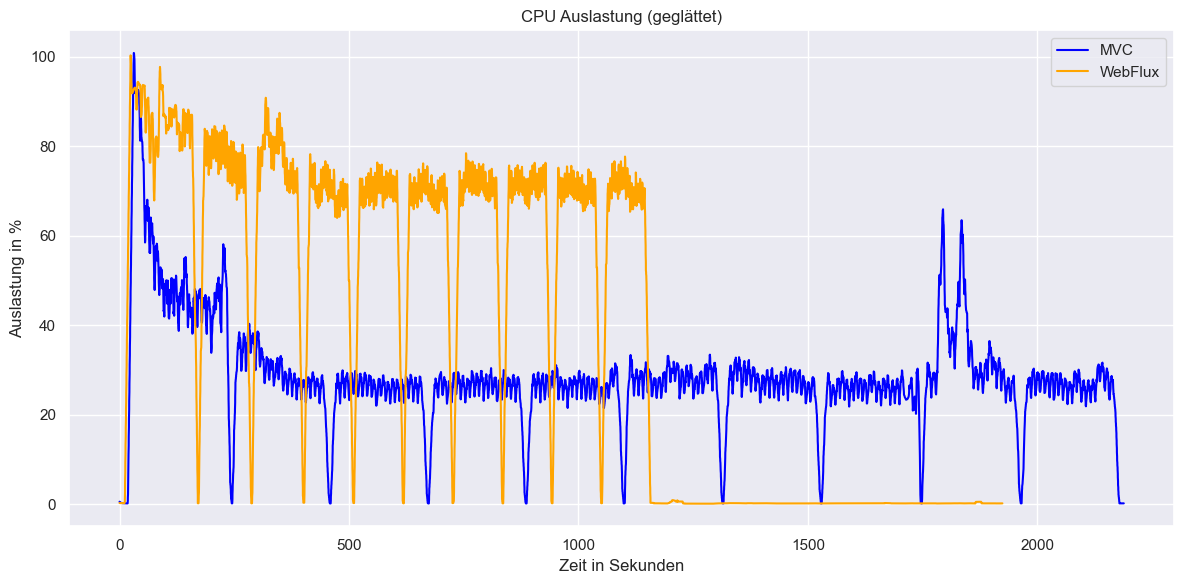

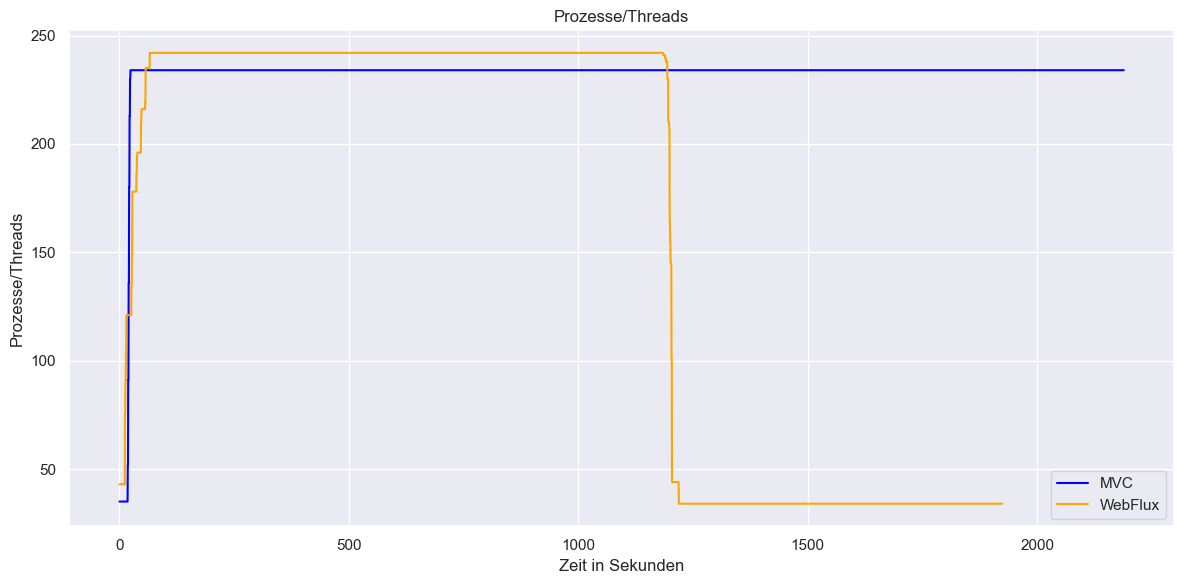

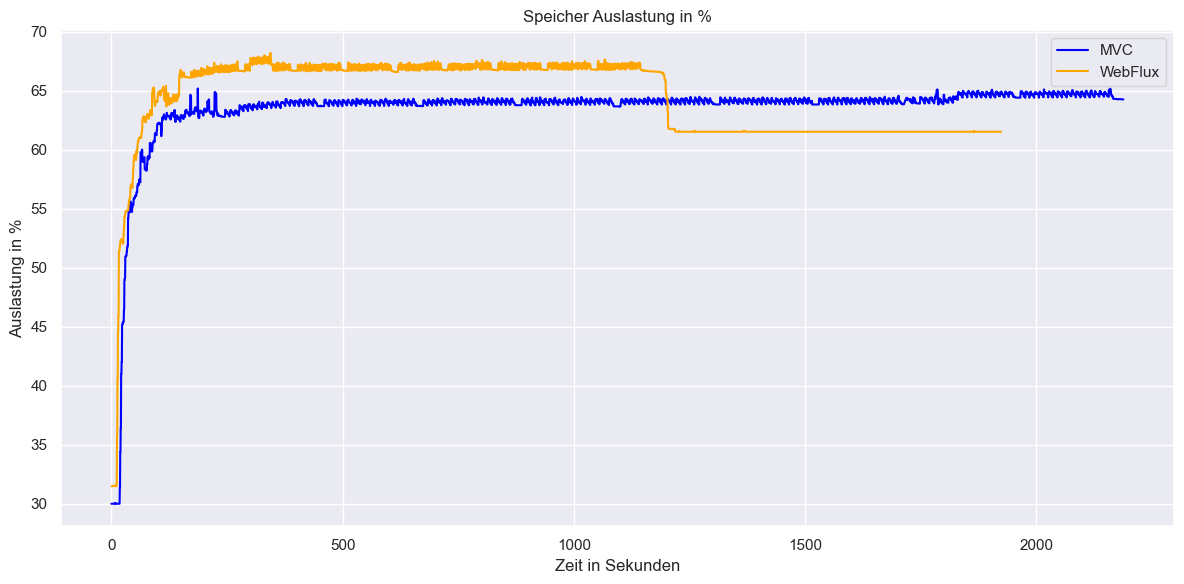

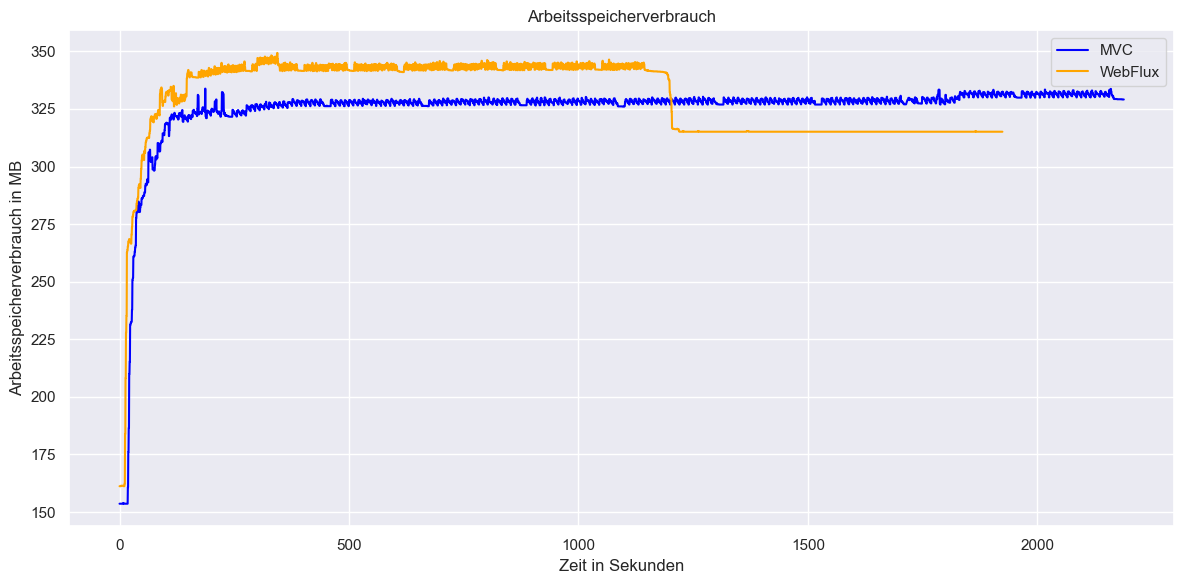

In [5]:
# CPU-Auslastung
plt.figure(figsize=(12, 6))
sns.lineplot(data=json_mvc_df, x='timestamp', y='cpu_percent', label='MVC', color='blue')
sns.lineplot(data=json_webflux_df, x='timestamp', y='cpu_percent', label='WebFlux', color='orange')
plt.title('CPU Auslastung')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Auslastung in %')
plt.grid(True)
plt.tight_layout()
plt.show()

# Rolling Average anwenden
json_mvc_df['cpu_smooth'] = json_mvc_df['cpu_percent'].rolling(window=50, min_periods=1).mean()
json_webflux_df['cpu_smooth'] = json_webflux_df['cpu_percent'].rolling(window=50, min_periods=1).mean()

# Glatt dargestellte CPU-Auslastung plotten
plt.figure(figsize=(12, 6))
sns.lineplot(data=json_mvc_df, x='timestamp', y='cpu_smooth', label='MVC', color='blue')
sns.lineplot(data=json_webflux_df, x='timestamp', y='cpu_smooth', label='WebFlux', color='orange')
plt.title('CPU Auslastung (geglättet)')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Auslastung in %')
plt.grid(True)
plt.tight_layout()
plt.show()

# Prozesse/Threads
plt.figure(figsize=(12, 6))
sns.lineplot(data=json_mvc_df, x='timestamp', y='pids', label='MVC', color='blue')
sns.lineplot(data=json_webflux_df, x='timestamp', y='pids', label='WebFlux', color='orange')
plt.title('Prozesse/Threads')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Prozesse/Threads')
plt.grid(True)
plt.tight_layout()
plt.show()

# Speicher-Auslastung in %
plt.figure(figsize=(12, 6))
sns.lineplot(data=json_mvc_df, x='timestamp', y='mem_percent', label='MVC', color='blue')
sns.lineplot(data=json_webflux_df, x='timestamp', y='mem_percent', label='WebFlux', color='orange')
plt.title('Speicher Auslastung in %')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Auslastung in %')
plt.grid(True)
plt.tight_layout()
plt.show()

# Speicherverbrauch in MB
plt.figure(figsize=(12, 6))
sns.lineplot(data=json_mvc_df, x='timestamp', y='mem_used_mb', label='MVC', color='blue')
sns.lineplot(data=json_webflux_df, x='timestamp', y='mem_used_mb', label='WebFlux', color='orange')
plt.title('Arbeitsspeicherverbrauch')
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Arbeitsspeicherverbrauch in MB')
plt.grid(True)
plt.tight_layout()
plt.show()


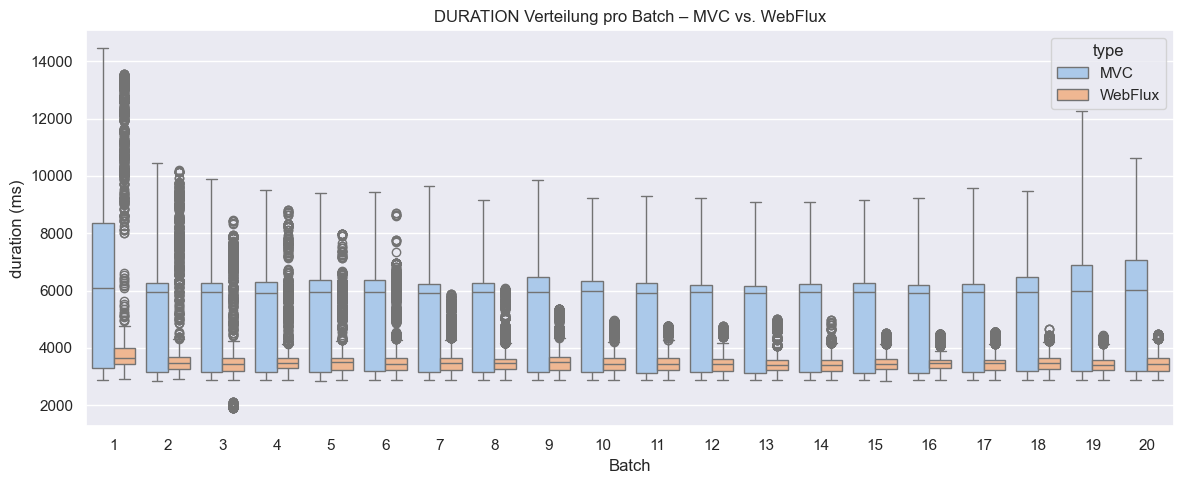

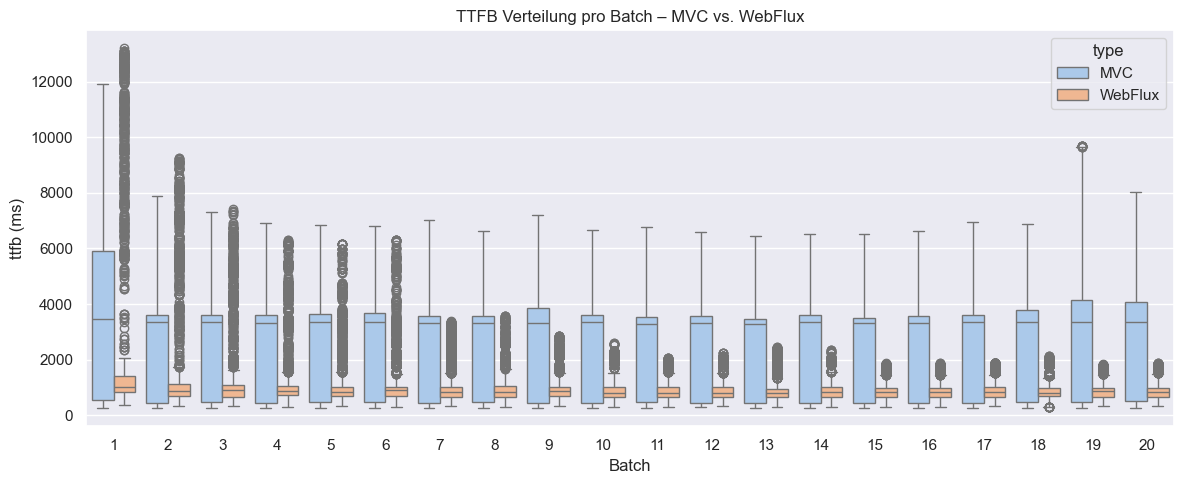

In [6]:
def plot_combined_boxplot_per_batch(data, metric):
    plt.figure(figsize=(12, 5))
    sns.boxplot(
        data=data,
        x='batch',
        y=metric,
        hue='type',
        order=sorted(data['batch'].unique()),
        palette='pastel'
    )
    plt.title(f'{metric.upper()} Verteilung pro Batch – MVC vs. WebFlux')
    plt.ylabel(f'{metric} (ms)')
    plt.xlabel('Batch')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

plot_combined_boxplot_per_batch(df, 'duration')
plot_combined_boxplot_per_batch(df, 'ttfb')

✅ Grafik gespeichert unter: C:\Users\Serhat\Desktop\Python-Grafiken\duration_combined.svg


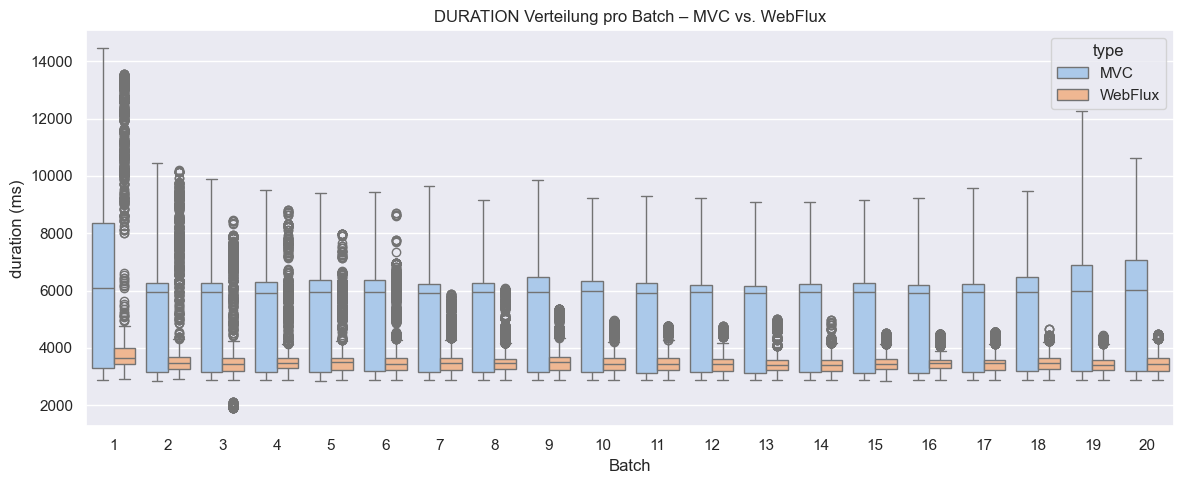

✅ Grafik gespeichert unter: C:\Users\Serhat\Desktop\Python-Grafiken\ttfb_combined.svg


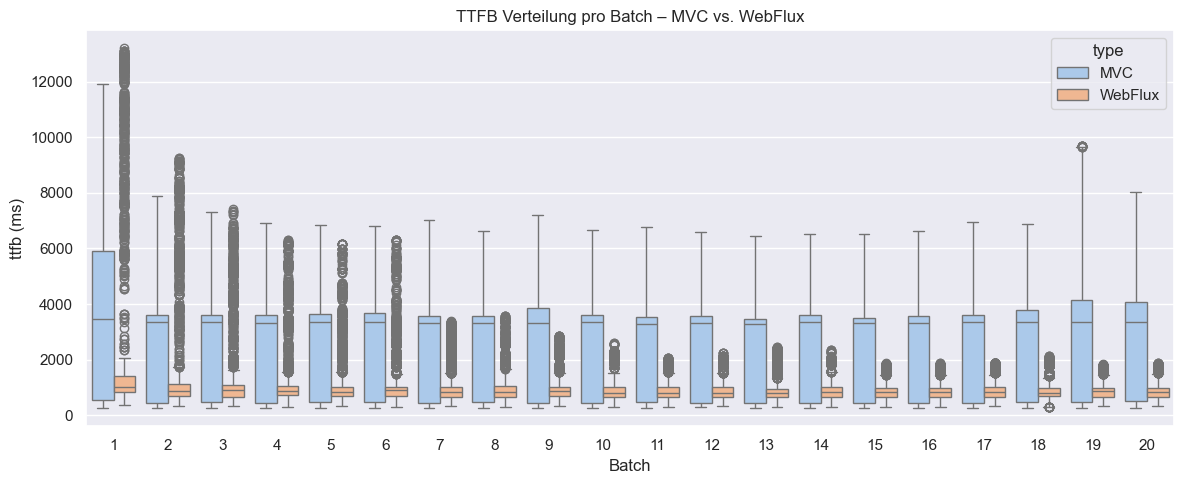

In [12]:
import os

output_dir = r"C:\Users\Serhat\Desktop\Python-Grafiken"
os.makedirs(output_dir, exist_ok=True)

def plot_combined_boxplot_per_batch(data, metric):
    plt.figure(figsize=(12, 5))
    sns.boxplot(
        data=data,
        x='batch',
        y=metric,
        hue='type',
        order=sorted(data['batch'].unique()),
        palette='pastel'
    )
    plt.title(f'{metric.upper()} Verteilung pro Batch – MVC vs. WebFlux')
    plt.ylabel(f'{metric} (ms)')
    plt.xlabel('Batch')
    plt.grid(True, axis='y')
    plt.tight_layout()
    
    # SVG speichern
    filename = os.path.join(output_dir, f"{metric}_combined.svg")
    plt.savefig(filename, format='svg', bbox_inches='tight')
    print(f"Grafik gespeichert unter: {filename}")
    
    plt.show()

plot_combined_boxplot_per_batch(df, 'duration')
plot_combined_boxplot_per_batch(df, 'ttfb')

✅ Grafik gespeichert unter: C:\Users\Serhat\Desktop\Python-Grafiken\ressourcenvergleich_mvc_webflux.svg


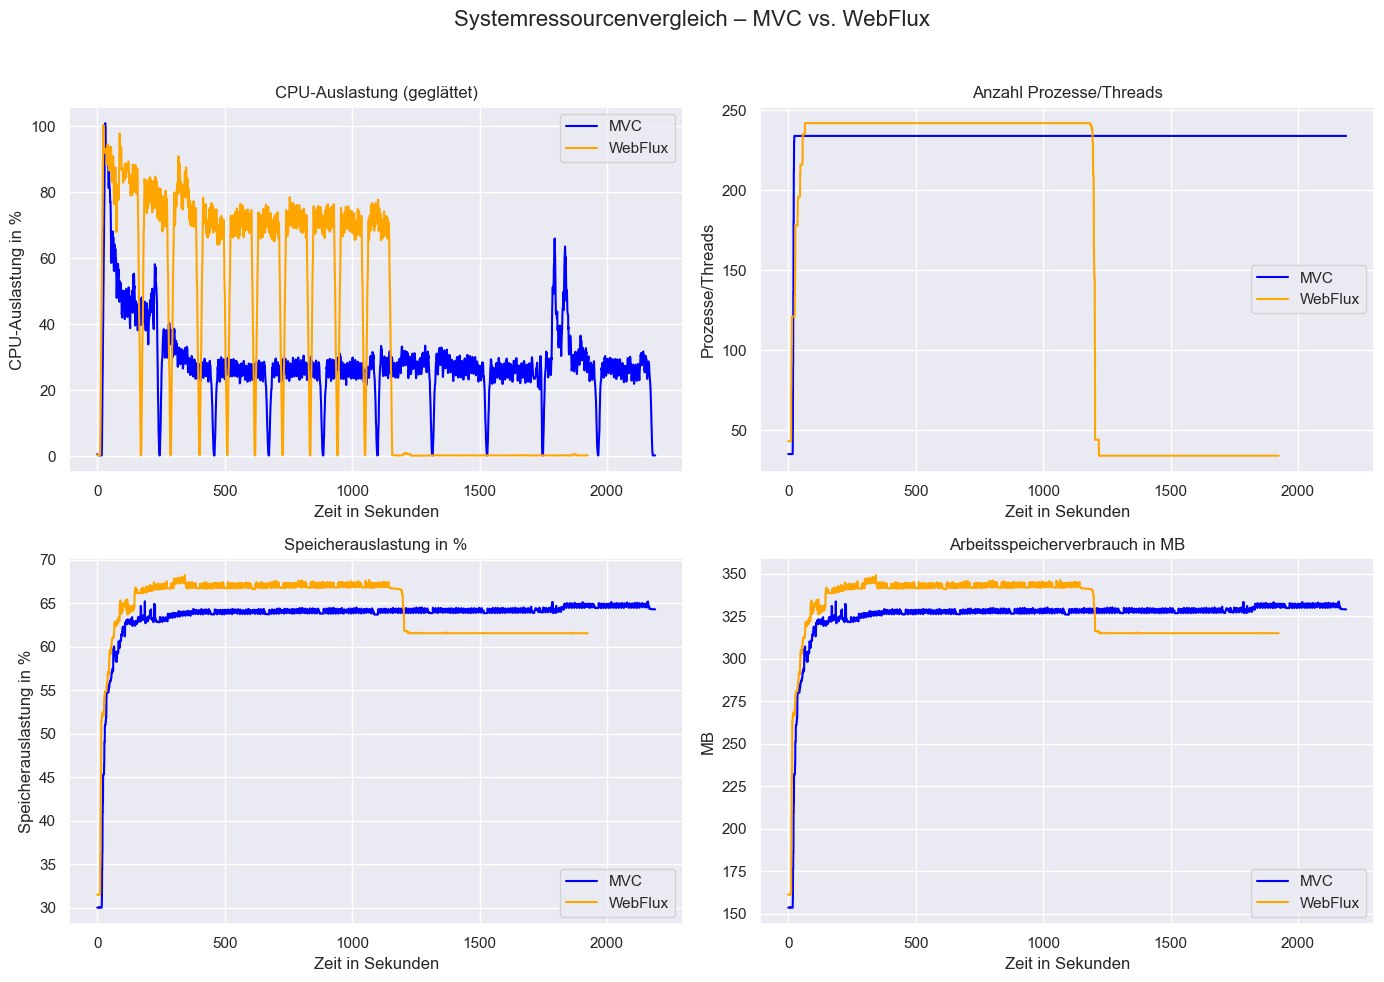

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ausgabeordner (optional)
output_dir = r"C:\Users\Serhat\Desktop\Python-Grafiken"
os.makedirs(output_dir, exist_ok=True)

# Rolling Average anwenden
json_mvc_df['cpu_smooth'] = json_mvc_df['cpu_percent'].rolling(window=50, min_periods=1).mean()
json_webflux_df['cpu_smooth'] = json_webflux_df['cpu_percent'].rolling(window=50, min_periods=1).mean()

# Subplots anlegen
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Systemressourcenvergleich – MVC vs. WebFlux', fontsize=16)

# Plot 1 – CPU-Auslastung
sns.lineplot(ax=axes[0, 0], data=json_mvc_df, x='timestamp', y='cpu_smooth', label='MVC', color='blue')
sns.lineplot(ax=axes[0, 0], data=json_webflux_df, x='timestamp', y='cpu_smooth', label='WebFlux', color='orange')
axes[0, 0].set_title('CPU-Auslastung (geglättet)')
axes[0, 0].set_xlabel('Zeit in Sekunden')
axes[0, 0].set_ylabel('CPU-Auslastung in %')
axes[0, 0].grid(True)

# Plot 2 – Prozesse/Threads
sns.lineplot(ax=axes[0, 1], data=json_mvc_df, x='timestamp', y='pids', label='MVC', color='blue')
sns.lineplot(ax=axes[0, 1], data=json_webflux_df, x='timestamp', y='pids', label='WebFlux', color='orange')
axes[0, 1].set_title('Anzahl Prozesse/Threads')
axes[0, 1].set_xlabel('Zeit in Sekunden')
axes[0, 1].set_ylabel('Prozesse/Threads')
axes[0, 1].grid(True)

# Plot 3 – Speicher-Auslastung in %
sns.lineplot(ax=axes[1, 0], data=json_mvc_df, x='timestamp', y='mem_percent', label='MVC', color='blue')
sns.lineplot(ax=axes[1, 0], data=json_webflux_df, x='timestamp', y='mem_percent', label='WebFlux', color='orange')
axes[1, 0].set_title('Speicherauslastung in %')
axes[1, 0].set_xlabel('Zeit in Sekunden')
axes[1, 0].set_ylabel('Speicherauslastung in %')
axes[1, 0].grid(True)

# Plot 4 – RAM-Verbrauch in MB
sns.lineplot(ax=axes[1, 1], data=json_mvc_df, x='timestamp', y='mem_used_mb', label='MVC', color='blue')
sns.lineplot(ax=axes[1, 1], data=json_webflux_df, x='timestamp', y='mem_used_mb', label='WebFlux', color='orange')
axes[1, 1].set_title('Arbeitsspeicherverbrauch in MB')
axes[1, 1].set_xlabel('Zeit in Sekunden')
axes[1, 1].set_ylabel('MB')
axes[1, 1].grid(True)

# Layout optimieren & speichern
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Platz für Haupttitel lassen
filename = os.path.join(output_dir, "ressourcenvergleich_mvc_webflux.svg")
plt.savefig(filename, format='svg', bbox_inches='tight')
print(f"Grafik gespeichert unter: {filename}")
plt.show()